# **Installations et imports**

In [ ]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [ ]:
import cv2
import numpy as np
import os
import random
import shutil
import matplotlib.pyplot as plt
from roboflow import Roboflow

# **Dataset Keypoints**

In [ ]:
roboflow_api_key = "#########"
rf = Roboflow(api_key=roboflow_api_key )
project = rf.workspace("amine-niolq").project("basketball-court-detection-2-pxhgu")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


# **Training**

In [ ]:
from ultralytics import YOLO
from google.colab import files

model = YOLO("yolo11x-pose.pt")

model.train(
    data=dataset.location + "/data.yaml",
    epochs=70,
    imgsz=640,
    batch=8,
    project="runs/train",
    name="yolov11_xl_basketball_court_new"
)

files.download("runs/train/yolov11_xl_basketball_court_new/weights/best.pt")

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/basketball-court-detection-2-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11x-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov11_xl_basketball_court_new, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100

Overriding model.yaml kpt_shape=[17, 3] with kpt_shape=[33, 3]
Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2784  ultralytics.nn.modules.conv.Conv             [3, 96, 3, 2]                 
  1                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  2                  -1  2    389760  ultralytics.nn.modules.block.C3k2            [192, 384, 2, True, 0.25]     
  3                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
  4                  -1  2   1553664  ultralytics.nn.modules.block.C3k2            [384, 768, 2, True, 0.25]     
  5                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              


  6                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  7                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              
  8                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  9                  -1  1   1476864  ultralytics.nn.modules.block.SPPF            [768, 768, 5]                 
 10                  -1  2   3264768  ultralytics.nn.modules.block.C2PSA           [768, 768, 2]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  2   5612544  ultralytics.nn.modules.block.C3k2            [1536, 768, 2, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1963.4±943.9 MB/s, size: 78.3 KB)


train: Scanning /content/basketball-court-detection-2-1/train/labels... 1830 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1830/1830 [00:01<00:00, 921.26it/s]

train: New cache created: /content/basketball-court-detection-2-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 783.4±525.5 MB/s, size: 76.2 KB)


val: Scanning /content/basketball-court-detection-2-1/valid/labels... 124 images, 0 backgrounds, 0 corrupt: 100%|██████████| 124/124 [00:00<00:00, 707.89it/s]

val: New cache created: /content/basketball-court-detection-2-1/valid/labels.cache


Plotting labels to runs/train/yolov11_xl_basketball_court_new/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 173 weight(decay=0.0), 183 weight(decay=0.0005), 182 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/train/yolov11_xl_basketball_court_new
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       1/70      8.23G     0.7988      10.22     0.5571     0.8228      1.275         16        640: 100%|██████████| 229/229 [01:29<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]

                   all        124        124      0.366      0.887       0.37      0.205          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       2/70      9.88G     0.7908      9.561     0.4419     0.6599      1.236         13        640: 100%|██████████| 229/229 [01:24<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        124        124      0.895      0.927      0.973      0.621          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       3/70        10G     0.7438      8.612     0.4212     0.6431      1.206         17        640: 100%|██████████| 229/229 [01:23<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        124        124      0.528      0.806       0.62      0.206    0.00215    0.00806   0.000124   2.47e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       4/70      10.2G     0.6443       7.29     0.4079     0.5761      1.152         18        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        124        124      0.938      0.972      0.992      0.765      0.499      0.492      0.344     0.0817



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       5/70      10.3G     0.6085      6.654     0.4019     0.5426      1.127         15        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        124        124      0.898      0.992      0.982      0.841      0.734      0.798      0.671      0.255



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       6/70      10.4G     0.5831       6.12     0.3954     0.5104      1.112         20        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        124        124      0.991          1      0.995      0.891       0.68      0.685      0.555      0.215



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       7/70        11G     0.5531      5.752     0.3927     0.4859        1.1         20        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        124        124      0.925       0.96      0.979      0.813      0.661      0.685      0.582      0.203



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       8/70      11.1G     0.5228       5.56     0.3914     0.4567      1.082         13        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        124        124      0.993      0.984      0.995      0.865      0.889      0.847      0.808      0.381



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       9/70      8.98G     0.5325      5.112      0.386     0.4697      1.088         12        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        124        124      0.991      0.984      0.994      0.892      0.934      0.911      0.923      0.463



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      10/70      9.03G     0.5199      4.968     0.3895     0.4582      1.077         16        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        124        124      0.985          1      0.995       0.91      0.867      0.831      0.854      0.348



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      11/70      9.19G     0.5014      4.839     0.3828     0.4289       1.07         13        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        124        124      0.992      0.999      0.995      0.898      0.924      0.911      0.916      0.525



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      12/70      9.73G     0.4934      4.546     0.3885     0.4272      1.071         15        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        124        124      0.999          1      0.995      0.918      0.923      0.919      0.919      0.576



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      13/70      10.4G     0.4831       4.58      0.379     0.4223      1.058         12        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        124        124      0.991          1      0.995      0.862      0.896      0.903      0.893      0.541



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      14/70      10.5G     0.4779      4.307     0.3802      0.398      1.058         16        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        124        124      0.983          1      0.995      0.904      0.873      0.887      0.876      0.545



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      15/70      10.6G     0.4687      4.118     0.3761     0.3933      1.047         20        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        124        124      0.969      0.993      0.995      0.928      0.921      0.935      0.931      0.516



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      16/70      10.9G     0.4644      4.027     0.3761     0.3952      1.048         16        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        124        124      0.999          1      0.995      0.917      0.908      0.895      0.888      0.529



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      17/70      11.2G     0.4619      3.903      0.373     0.3891      1.054         17        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124      0.978          1      0.995      0.904      0.907      0.927      0.916      0.542



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      18/70      9.04G      0.451      3.742     0.3766     0.3753      1.048         16        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        124        124      0.991          1      0.995      0.871      0.925      0.919      0.912      0.567



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      19/70      9.05G     0.4423      3.811     0.3649     0.3819      1.039         15        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        124        124      0.999          1      0.995      0.922      0.944      0.944      0.945       0.62



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      20/70      9.19G     0.4436      3.525     0.3776     0.3772      1.036         11        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        124        124      0.999          1      0.995      0.922      0.918      0.903      0.905      0.588



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      21/70      9.52G     0.4494      3.484     0.3712     0.3687       1.04         16        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        124        124      0.999          1      0.995      0.934      0.969      0.935      0.942        0.6



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      22/70      9.86G     0.4311      3.398     0.3676     0.3563      1.034         19        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        124        124      0.999          1      0.995      0.924      0.935      0.935      0.937      0.607



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      23/70      10.2G     0.4396       3.36     0.3691     0.3483      1.041         16        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        124        124      0.989          1      0.995      0.922       0.95       0.96      0.963      0.633



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      24/70      10.8G     0.4393      3.239     0.3681       0.35      1.033         15        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        124        124      0.982          1      0.995      0.924      0.927      0.924      0.945      0.716



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      25/70        11G     0.4261       3.23     0.3649     0.3464      1.038         12        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124      0.999          1      0.995      0.932      0.935      0.935      0.953      0.649



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      26/70      11.2G      0.415      3.182     0.3591     0.3344      1.021         15        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        124        124      0.999          1      0.995      0.943      0.943      0.944      0.962      0.605



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      27/70      9.06G     0.3993      3.155      0.358     0.3357       1.02         18        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        124        124          1      0.999      0.995      0.942      0.935      0.928      0.947      0.705



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      28/70      9.06G     0.4003      3.119     0.3509     0.3346      1.022         10        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124          1          1      0.995      0.943      0.927      0.927      0.962      0.643



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      29/70       9.2G     0.4195        3.1     0.3528     0.3367      1.036         13        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        124        124      0.999          1      0.995      0.927      0.943      0.944      0.954      0.686



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      30/70      9.52G      0.401      3.005     0.3456     0.3318      1.022         13        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        124        124      0.999          1      0.995      0.924      0.951      0.952      0.956      0.628



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      31/70      10.1G     0.4011      2.956     0.3457     0.3313      1.023         12        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124      0.999          1      0.995      0.928      0.966      0.952      0.972       0.69



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      32/70      10.3G     0.4096      2.818     0.3341     0.3318      1.018         12        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        124        124          1          1      0.995      0.942      0.919      0.919      0.912      0.637



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      33/70      10.5G     0.3946      2.755     0.3218     0.3222       1.02         17        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        124        124          1          1      0.995      0.939      0.943      0.944      0.954      0.665



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      34/70      10.9G     0.3975       2.75     0.3179     0.3254      1.013         14        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        124        124          1          1      0.995      0.944      0.951      0.952      0.953      0.697



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      35/70      11.2G     0.3989      2.731     0.3096     0.3216      1.018         10        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124          1          1      0.995       0.93      0.928      0.935      0.939       0.66



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      36/70      9.06G     0.3866      2.713     0.2985     0.3196      1.015         13        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124      0.999          1      0.995      0.921      0.967      0.968      0.967      0.713



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      37/70      9.06G     0.3831      2.652       0.29     0.3109      1.006         14        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124      0.999          1      0.995       0.91       0.95      0.952      0.946      0.739



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      38/70       9.2G     0.3936      2.541     0.2767     0.3103      1.022          9        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124          1          1      0.995       0.94      0.943      0.944      0.938      0.735



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      39/70      9.82G     0.3802      2.428      0.274     0.3063      1.011         16        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        124        124          1          1      0.995      0.949      0.959       0.96      0.961      0.766



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      40/70      9.96G     0.3815      2.527     0.2619     0.3026      1.013         11        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124          1          1      0.995      0.933      0.959       0.96      0.965      0.713



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      41/70      10.2G     0.3653      2.458       0.26     0.2887     0.9987         18        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124          1          1      0.995      0.947      0.959       0.96      0.977      0.797



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      42/70      10.5G     0.3738       2.33     0.2485     0.2968      1.011         15        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        124        124          1          1      0.995      0.942      0.945      0.944      0.955      0.757



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      43/70      10.9G     0.3646      2.365     0.2461     0.2911      1.006         19        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124      0.999          1      0.995      0.937      0.967      0.968      0.983      0.764



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      44/70      11.2G     0.3691      2.282     0.2428     0.3051      1.001         13        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        124        124          1          1      0.995      0.948      0.975      0.976      0.974      0.757



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      45/70      9.06G     0.3634      2.364     0.2361     0.2918      1.008         15        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124      0.999          1      0.995       0.94       0.96      0.967      0.981      0.801



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      46/70      9.06G     0.3527      2.263     0.2341      0.288          1         15        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124          1          1      0.995      0.937      0.959       0.96      0.959      0.775



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      47/70       9.2G     0.3543      2.241     0.2278     0.2932      1.002         15        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124          1          1      0.995      0.953      0.959       0.96      0.973      0.826



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      48/70      9.54G     0.3653      2.158     0.2222     0.2836      1.005         17        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        124        124          1          1      0.995      0.952       0.96      0.967      0.975       0.81



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      49/70      9.88G     0.3581      2.246     0.2225     0.2922      1.003         17        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124          1          1      0.995      0.933      0.959       0.96       0.96      0.764



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      50/70      10.5G     0.3454      2.218     0.2183     0.2843     0.9968         15        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        124        124          1          1      0.995      0.938      0.967      0.968       0.98      0.857



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      51/70      10.6G     0.3486      2.064       0.22     0.2762     0.9987         19        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        124        124      0.999          1      0.995      0.946       0.96      0.968      0.974      0.837



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      52/70      10.9G     0.3506      2.088     0.2148     0.2816     0.9996         13        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        124        124          1          1      0.995      0.914      0.951      0.952      0.962       0.83



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      53/70      11.2G     0.3376      2.042      0.213     0.2756      0.989         16        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        124        124          1          1      0.995      0.947      0.975      0.976      0.986      0.817



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      54/70      8.76G     0.3309      2.004     0.2091     0.2687     0.9842         18        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124          1          1      0.995      0.946      0.967      0.968      0.978      0.825



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      55/70       9.2G     0.3568      1.933     0.2082      0.281      1.007         14        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        124        124          1          1      0.995      0.921      0.967      0.968      0.966      0.833



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      56/70      9.34G     0.3347      1.978     0.2074     0.2668     0.9916         16        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        124        124          1          1      0.995      0.948      0.975      0.976      0.984      0.862



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      57/70      9.51G     0.3329      1.902     0.2036     0.2676     0.9928         14        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        124        124          1          1      0.995      0.954      0.967      0.968      0.973      0.854



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      58/70      9.86G     0.3342      1.988     0.2022     0.2732     0.9922         16        640: 100%|██████████| 229/229 [01:23<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        124        124          1          1      0.995      0.926      0.951      0.952      0.966      0.855



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      59/70      10.2G     0.3394      1.928     0.1991     0.2719      1.002         16        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        124        124          1          1      0.995      0.954      0.959       0.96      0.972      0.852



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      60/70      10.8G     0.3423      1.892     0.2002     0.2691      0.998         12        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124          1          1      0.995      0.954      0.959       0.96      0.971      0.867


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      61/70      10.9G     0.3345     0.8589     0.1747     0.2006      1.014          6        640: 100%|██████████| 229/229 [01:23<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        124        124          1          1      0.995      0.943      0.975      0.976      0.981      0.869



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      62/70      11.2G     0.3365     0.7495     0.1402     0.1922      1.023          6        640: 100%|██████████| 229/229 [01:22<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        124        124          1          1      0.995      0.947      0.975      0.976      0.985      0.894



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      63/70      9.03G     0.3275     0.6927     0.1333     0.1888       1.02          6        640: 100%|██████████| 229/229 [01:23<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        124        124          1          1      0.995       0.94      0.967      0.968       0.98      0.907



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      64/70      9.45G     0.3191     0.6494     0.1295      0.181       1.01          6        640: 100%|██████████| 229/229 [01:22<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        124        124          1          1      0.995       0.94      0.975      0.976      0.981      0.891



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      65/70      9.58G     0.3192     0.6145     0.1241     0.1767       1.01          6        640: 100%|██████████| 229/229 [01:22<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        124        124      0.999          1      0.995      0.943      0.983      0.984      0.981      0.878



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      66/70      9.69G     0.3169     0.6037     0.1201     0.1742      1.007          6        640: 100%|██████████| 229/229 [01:22<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        124        124          1          1      0.995      0.947      0.983      0.984      0.981      0.882



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      67/70      9.85G      0.311     0.5891     0.1171     0.1715      1.012          6        640: 100%|██████████| 229/229 [01:22<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124          1          1      0.995      0.948      0.967      0.968      0.978      0.898



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      68/70      10.2G     0.3096     0.5587     0.1175     0.1699      1.005          6        640: 100%|██████████| 229/229 [01:22<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        124        124          1          1      0.995      0.947      0.975      0.976      0.975      0.896



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      69/70      10.5G     0.3054     0.5432     0.1156     0.1634      0.996          6        640: 100%|██████████| 229/229 [01:22<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        124        124          1          1      0.995      0.945      0.975      0.976      0.983      0.916



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      70/70      10.9G     0.3053     0.5392     0.1157     0.1627      1.005          6        640: 100%|██████████| 229/229 [01:22<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        124        124          1          1      0.995      0.946      0.975      0.976      0.982      0.909



70 epochs completed in 1.698 hours.
Optimizer stripped from runs/train/yolov11_xl_basketball_court_new/weights/last.pt, 118.4MB
Optimizer stripped from runs/train/yolov11_xl_basketball_court_new/weights/best.pt, 118.4MB

Validating runs/train/yolov11_xl_basketball_court_new/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11x-pose summary (fused): 199 layers, 58,833,820 parameters, 0 gradients, 203.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]


                   all        124        124          1          1      0.995      0.945      0.975      0.976      0.983      0.916
Speed: 0.2ms preprocess, 13.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/train/yolov11_xl_basketball_court_new


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Visualisation des prédictions du modèle**


image 1/124 /content/basketball-court-detection-2-1/valid/images/boston-celtics-new-york-knicks-game-1-q1-04_28-04_20_mp4-0001_jpg.rf.dd52b74e2919674cd495d2c746c90443.jpg: 640x640 1 court, 20.6ms
image 2/124 /content/basketball-court-detection-2-1/valid/images/boston-celtics-new-york-knicks-game-1-q1-04_28-04_20_mp4-0007_jpg.rf.99fedd1a1ff0b0b383af54de7e90ba38.jpg: 640x640 1 court, 21.2ms
image 3/124 /content/basketball-court-detection-2-1/valid/images/boston-celtics-new-york-knicks-game-1-q1-04_44-04_39_mp4-0004_jpg.rf.df8e4cccb74bba4529ec7690aeb2ea4d.jpg: 640x640 1 court, 20.9ms
image 4/124 /content/basketball-court-detection-2-1/valid/images/boston-celtics-new-york-knicks-game-1-q1-05_13-05_09_mp4-0001_jpg.rf.012c4086020bf2213c30884ecdef33f8.jpg: 640x640 1 court, 20.9ms
image 5/124 /content/basketball-court-detection-2-1/valid/images/boston-celtics-new-york-knicks-game-1-q1-06_00-05_54_mp4-0004_jpg.rf.a5d45c32688755d4f5d32071663483f0.jpg: 640x640 1 court, 21.0ms
image 6/124 /conten

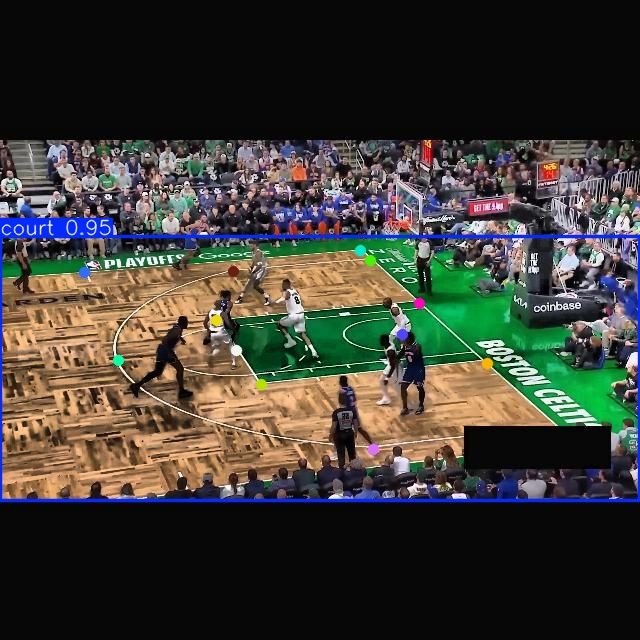

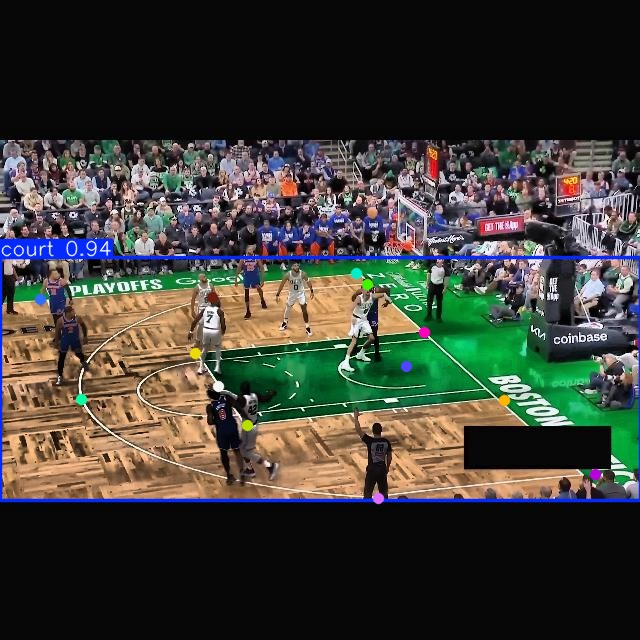

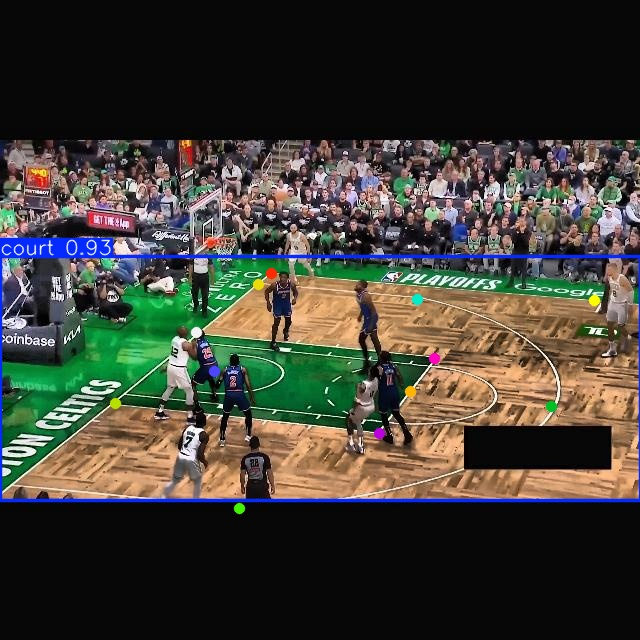

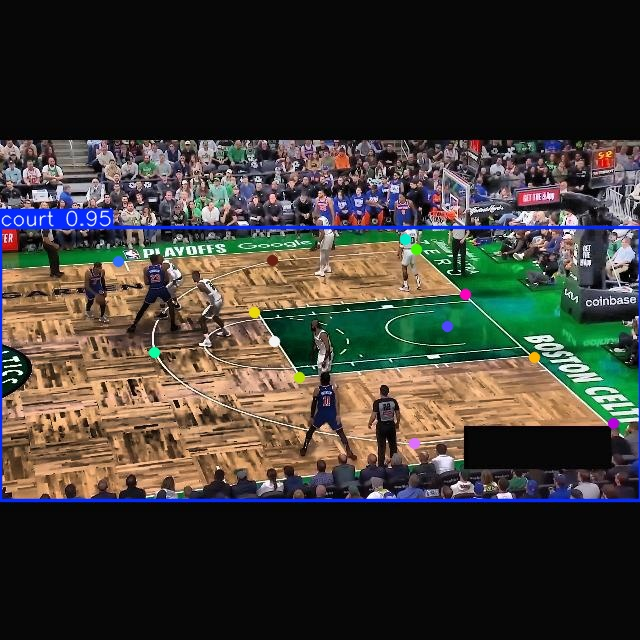

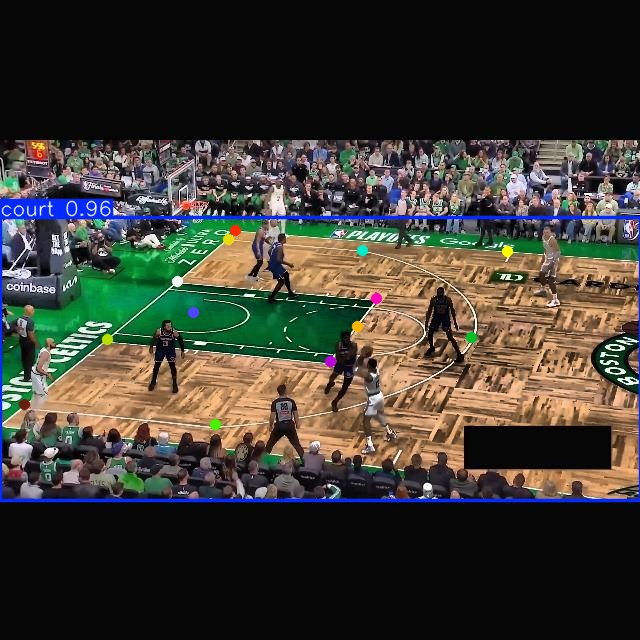

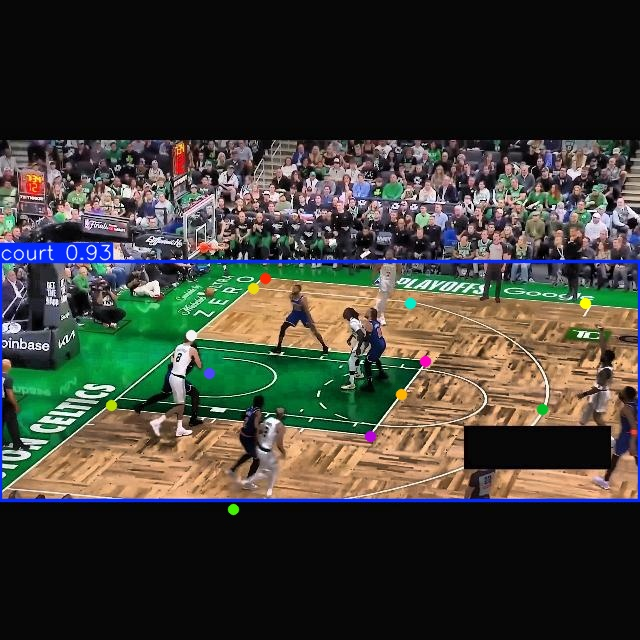

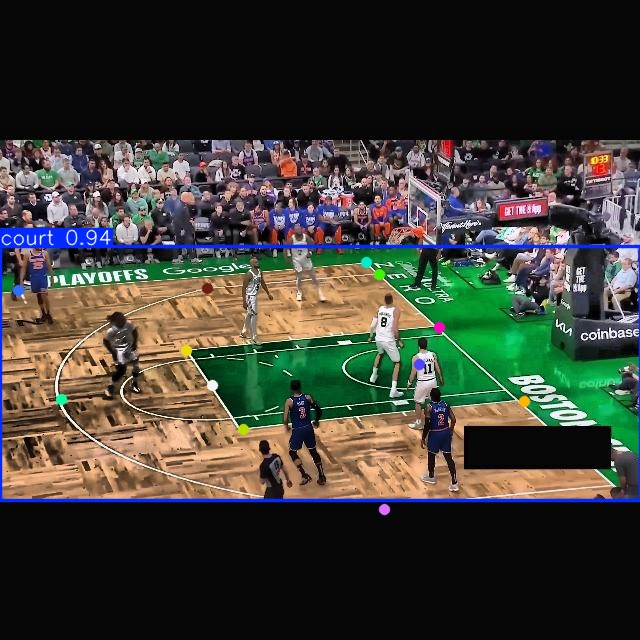

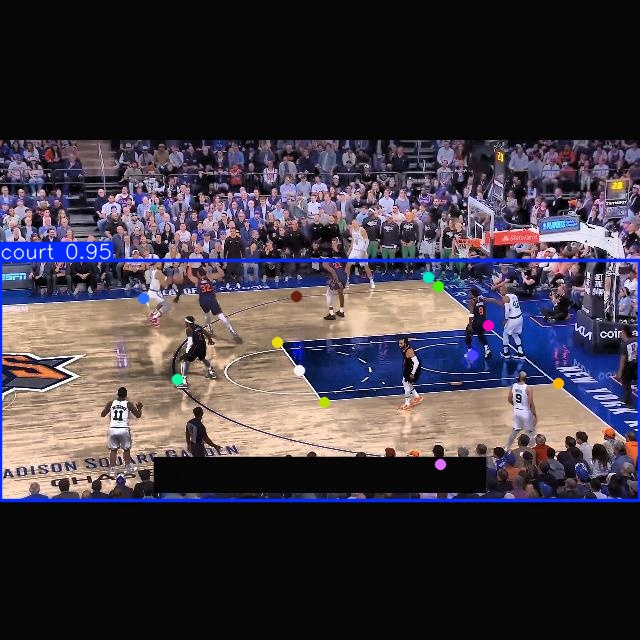

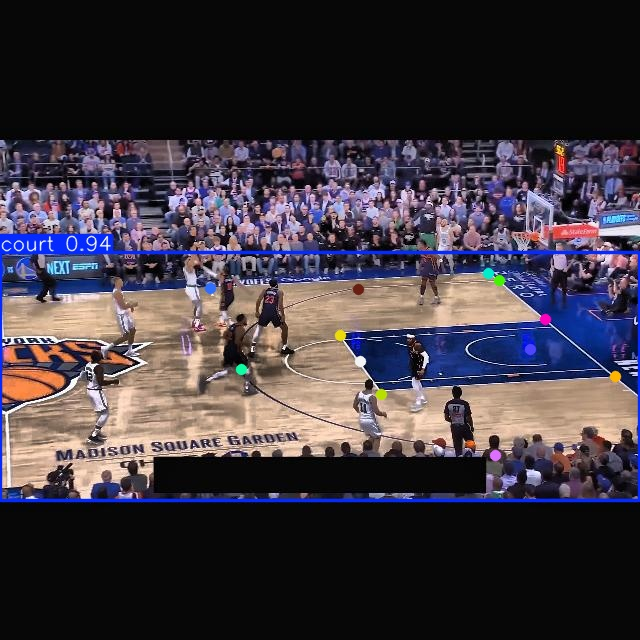

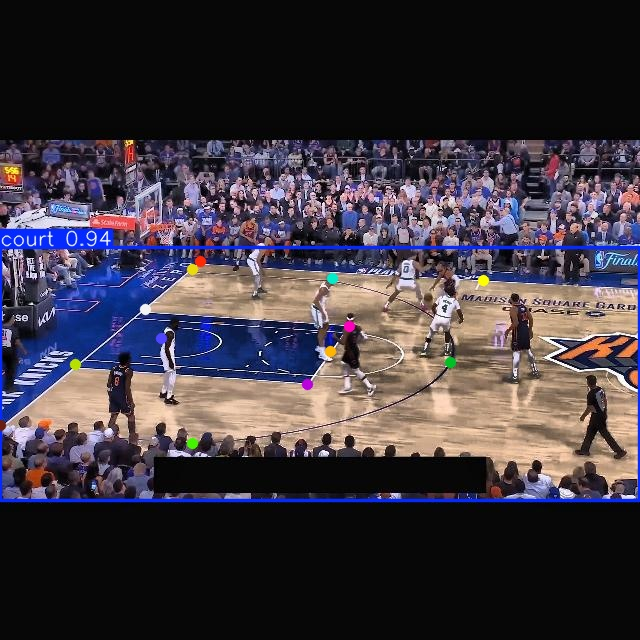

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

model1 = YOLO("runs/train/yolov11_xl_basketball_court_new/weights/best.pt")


# Inférence
results = model1.predict(
    source="/content/basketball-court-detection-2-1/valid/images",
    imgsz=640,
    conf=0.25,
    save=True,
    save_txt=False
)


for i, r in enumerate(results[:10]):
    fname = os.path.basename(r.path)
    n_boxes = r.boxes.data.shape[0]
    n_kpts  = r.keypoints.data.shape[0]
    print(f"{i+1}. {fname} → {n_boxes} boîte(s), {n_kpts} personne(s) détectée(s)")

for i in range(10):
  display(Image(filename=os.path.join("runs/pose/predict", os.path.basename(results[i].path))))

# **Video**

In [ ]:

MODEL_PATH   = "/content/runs/train/yolov11_xl_basketball_court_new/weights/best.pt" 
VIDEO_INPUT  = "/content/0021800110-129.mp4"           
VIDEO_OUTPUT = "/content/annotated_output_3_TEST.mp4"
IMGSZ        = 960                            
CONF_THRESH  = 0.25                          
DEVICE       = 0                               


import os, cv2, torch, time
import numpy as np
from tqdm import tqdm
from ultralytics import YOLO
from google.colab import files

assert os.path.exists(MODEL_PATH),   f"Modèle introuvable : {MODEL_PATH}"
assert os.path.exists(VIDEO_INPUT),  f"Vidéo introuvable : {VIDEO_INPUT}"

device = DEVICE if (isinstance(DEVICE, int) and torch.cuda.is_available()) else 'cpu'
model  = YOLO(MODEL_PATH)

cap = cv2.VideoCapture(VIDEO_INPUT)
if not cap.isOpened():
    raise RuntimeError(f"Impossible d'ouvrir la vidéo: {VIDEO_INPUT}")

fps = cap.get(cv2.CAP_PROP_FPS) or 25.0
w   = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h   = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
nF  = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  
out = cv2.VideoWriter(VIDEO_OUTPUT, fourcc, fps, (w, h))
if not out.isOpened():
    cap.release()
    raise RuntimeError(f"Impossible de créer la vidéo de sortie: {VIDEO_OUTPUT}")

start = time.time()
pbar = tqdm(total=nF if nF > 0 else None, desc="Annotation", unit="frame")

try:
    while True:
        ok, frame = cap.read()
        if not ok:
            break

        results = model.predict(
            frame,
            imgsz=IMGSZ,
            conf=CONF_THRESH,
            device=device,
            verbose=False
        )

        annotated = results[0].plot()  
        if annotated.shape[1] != w or annotated.shape[0] != h:
            annotated = cv2.resize(annotated, (w, h), interpolation=cv2.INTER_LINEAR)

        out.write(annotated)
        pbar.update(1)
finally:
    pbar.close()
    cap.release()
    out.release()

elapsed = time.time() - start
print(f"Terminé. Fichier: {VIDEO_OUTPUT} | Durée: {elapsed:.1f}s")

try:
    files.download(VIDEO_OUTPUT)
except Exception as e:
    print("Téléchargement automatique non disponible dans cet environnement. "
          f"Récupérez manuellement le fichier : {VIDEO_OUTPUT}\nDétails:", e)


Annotation: 100%|██████████| 538/538 [00:23<00:00, 23.20frame/s]

Terminé. Fichier: /content/annotated_output_3_TEST.mp4 | Durée: 23.2s


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>